In [1]:
%run constants.py

In [2]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FUNCTIONS/load_functions"

In [3]:
%run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FITS FILES/BAND6/load_band6_data.py"

In [4]:
# %run "/Users/audreyburggraf/Desktop/QUEEN'S/THESIS RESEARCH/PLOTTING C29 989/FUNCTIONS/load_functions"

In [5]:
BMAJ_pix, BMIN_pix, BPA_deg_cartesian, reference_length_pix, RA_centre_pix, Dec_centre_pix, xmin, xmax, ymin, ymax = get_plotting_parameters(StokesI_header, StokesI_wcs, 6)

In [6]:
# Actual vectors with scaled length
# --------------------------------------------------------------------------------------------------  
# List to store vector data
vector_data_actual_cartesian = []

# Loop over values in x and y
for x in range(0, nx, step):
    for y in range(0, ny, step):
        # Check if the conditions are met
        if (StokesI_data_2d_mJy[y, x] / StokesIerr_data_2d_mJy[y, x] > 3 and 
            calculated_polarized_intensity[y, x] / PolarizedIntensity_err_data_2d_mJy[y, x] > 3 and 
            PolarizationAngle_err_data_2d_deg[y, x] < 10): 
            
            # Get the polarization angle at this pixel
            angle_rad_cartesian = calculated_polarization_angle_rad[y, x] + np.pi/2
            
            # Get the polarization fraction at this pixel
            polarization_fraction = calc_polarized_frac[y, x]  # Add your data source
            
            # Scale vector length by polarization fraction
            vector_length_pix = max_length_pix * polarization_fraction
            
            # Compute the vector components
            dx = vector_length_pix * np.cos(angle_rad_cartesian)
            dy = vector_length_pix * np.sin(angle_rad_cartesian)
            
            # Store vector data in a row
            vector_data_actual_cartesian.append([x - dx / 2, x + dx / 2, y - dy / 2, y + dy / 2])
# --------------------------------------------------------------------------------------------------              
 

In [7]:
# vector_data_actual_same_length_cartesian, vector_angle_actual_same_length_sky = make_vectors_band6(ny, nx,  
#                                                                                                          StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
#                                                                                                          calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
#                                                                                                          calculated_polarization_angle_rad, PolarizationAngle_err_data_2d_deg)

In [8]:
# PA_grid_100Uniform = make_PA_grid_100Uniform(ny, nx, minor_angle_rad_sky_band6)
# PA_grid_100Azimuthal = make_PA_grid_100Azimuthal(ny, nx, RA_centre_pix, Dec_centre_pix)        

In [9]:
# vector_data_uniform_cartesian, vector_angle_uniform_sky = make_vectors_band6(ny, nx,  
#                                                                                    StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
#                                                                                    calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
#                                                                                    PA_grid_100Uniform, PolarizationAngle_err_data_2d_deg)

In [10]:
# vector_data_azimuthal_cartesian, vector_angle_azimuthal_sky = make_vectors_band6(ny, nx,  
#                                                                                        StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
#                                                                                        calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
#                                                                                        PA_grid_100Azimuthal, PolarizationAngle_err_data_2d_deg)


In [11]:
# StokesQ_grid_100Uniform,   StokesU_grid_100Uniform   = recover_StokesQU(PA_grid_100Uniform,   StokesI_data_2d_mJy, ny, nx)
# StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal = recover_StokesQU(PA_grid_100Azimuthal, StokesI_data_2d_mJy, ny, nx)


In [12]:
# Call the function
results = generate_polarization_vectors_band6(ny, nx,
                                              RA_centre_pix, Dec_centre_pix,
                                              minor_angle_rad_sky_band6,
                                              StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
                                              calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
                                              calculated_polarization_angle_rad, PolarizationAngle_err_data_2d_deg)


In [13]:
# Accessing the actual vector data and angles
vector_data_actual_cartesian = results['vector_data_actual_cartesian']
vector_angle_actual_sky = results['vector_angle_actual_sky']

# Accessing the vector data for 100 Uniform grid
vector_data_100Uniform_cartesian = results['vector_data_100Uniform_cartesian']
vector_angle_100Uniform_sky = results['vector_angle_100Uniform_sky']

# Accessing the Stokes Q and U grids for 100 Uniform grid
StokesQ_grid_100Uniform = results['StokesQ_grid_100Uniform']
StokesU_grid_100Uniform = results['StokesU_grid_100Uniform']

# Accessing the vector data for 100 Azimuthal grid
vector_data_100Azimuthal_cartesian = results['vector_data_100Azimuthal_cartesian']
vector_angle_100Azimuthal_sky = results['vector_angle_100Azimuthal_sky']

# Accessing the Stokes Q and U grids for 100 Azimuthal grid
StokesQ_grid_100Azimuthal = results['StokesQ_grid_100Azimuthal']
StokesU_grid_100Azimuthal = results['StokesU_grid_100Azimuthal']

In [14]:
TestingQU_angles_labels = ['0 deg', '45 deg', '90 deg', '135 deg']
TestingQU_angles_deg_ast = [0, 45, 90, 135]
TestingQU_angles_rad_ast = np.radians(TestingQU_angles_deg_ast)

In [15]:
# calculated_polarization_angle_rad = calculate_polarization_angle(StokesQ_data_2d_Jy, StokesU_data_2d_Jy)
# calc_polarized_frac = calculate_polarized_fraction(StokesQ_data_2d_mJy, StokesU_data_2d_mJy, StokesI_data_2d_mJy)
# calculated_polarized_intensity = calculate_polarized_intensity(StokesQ_data_2d_mJy, StokesU_data_2d_mJy)

In [16]:
# vector_angle_actual_same_length_sky

In [17]:
# Define the list of ratios to use
ratios = [(1, 0), (0.9, 0.1), (0.8, 0.2), (0.7, 0.3), (0.6, 0.4), (0.5, 0.5), 
          (0.4, 0.6), (0.3, 0.7), (0.2, 0.8), (0.1, 0.9), (0, 1)]

# Dictionary to store results
results = {}

# Loop through the ratios
for ratio1, ratio2 in ratios:
    
    # Run the function with the current ratio
    PA_grid, StokesQ_grid, StokesU_grid, vectors_data, vectors_angle = mix_StokesQU_and_generate_vectors(
        ratio1, ratio2, 
        StokesQ_grid_100Uniform, 
        StokesU_grid_100Uniform,
        StokesQ_grid_100Azimuthal, 
        StokesU_grid_100Azimuthal,
        ny, nx,
        step, vector_length_pix_const, 
        StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
        calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
        PolarizationAngle_err_data_2d_deg)
    
    # Create a key for the dictionary based on the ratio
    ratio_str = f"{int(ratio1 * 100)}{int(ratio2 * 100)}"  # e.g., "5050" for (0.5, 0.5)
    
    
    # Save the results in the dictionary
    results[f"PA_grid_{ratio_str}"] = PA_grid
    results[f"StokesQ_grid_{ratio_str}"] = StokesQ_grid
    results[f"StokesU_grid_{ratio_str}"] = StokesU_grid
    results[f"vectors_data_{ratio_str}"] = vectors_data
    results[f"vectors_angle_{ratio_str}"] = vectors_angle

In [18]:
PA_grid_100U_0A, StokesQ_grid_100U_0A, StokesU_grid_100U_0A, vectors_data_100U_0A_cartesian, vectors_angle_100U_0A_rad_sky = (results["PA_grid_1000"], results["StokesQ_grid_1000"], results["StokesU_grid_1000"], results["vectors_data_1000"], results["vectors_angle_1000"])
PA_grid_90U_10A, StokesQ_grid_90U_10A, StokesU_grid_90U_10A, vectors_data_90U_10A_cartesian, vectors_angle_90U_10A_rad_sky = (results["PA_grid_9010"], results["StokesQ_grid_9010"], results["StokesU_grid_9010"], results["vectors_data_9010"], results["vectors_angle_9010"])
PA_grid_80U_20A, StokesQ_grid_80U_20A, StokesU_grid_80U_20A, vectors_data_80U_20A_cartesian, vectors_angle_80U_20A_rad_sky = (results["PA_grid_8020"], results["StokesQ_grid_8020"], results["StokesU_grid_8020"], results["vectors_data_8020"], results["vectors_angle_8020"])
PA_grid_70U_30A, StokesQ_grid_70U_30A, StokesU_grid_703U_0A, vectors_data_70U_30A_cartesian, vectors_angle_70U_30A_rad_sky = (results["PA_grid_7030"], results["StokesQ_grid_7030"], results["StokesU_grid_7030"], results["vectors_data_7030"], results["vectors_angle_7030"])
PA_grid_60U_40A, StokesQ_grid_60U_40A, StokesU_grid_60U_40A, vectors_data_60U_40A_cartesian, vectors_angle_60U_40A_rad_sky = (results["PA_grid_6040"], results["StokesQ_grid_6040"], results["StokesU_grid_6040"], results["vectors_data_6040"], results["vectors_angle_6040"])
PA_grid_50U_50A, StokesQ_grid_50U_50A, StokesU_grid_50U_50A, vectors_data_50U_50A_cartesian, vectors_angle_50U_50A_rad_sky = (results["PA_grid_5050"], results["StokesQ_grid_5050"], results["StokesU_grid_5050"], results["vectors_data_5050"], results["vectors_angle_5050"])
PA_grid_40U_60A, StokesQ_grid_40U_60A, StokesU_grid_40U_60A, vectors_data_40U_60A_cartesian, vectors_angle_40U_60A_rad_sky = (results["PA_grid_4060"], results["StokesQ_grid_4060"], results["StokesU_grid_4060"], results["vectors_data_4060"], results["vectors_angle_4060"])
PA_grid_30U_70A, StokesQ_grid_30U_70A, StokesU_grid_30U_70A, vectors_data_30U_70A_cartesian, vectors_angle_30U_70A_rad_sky = (results["PA_grid_3070"], results["StokesQ_grid_3070"], results["StokesU_grid_3070"], results["vectors_data_3070"], results["vectors_angle_3070"])
PA_grid_20U_80A, StokesQ_grid_20U_80A, StokesU_grid_20U_80A, vectors_data_20U_80A_cartesian, vectors_angle_20U_80A_rad_sky = (results["PA_grid_2080"], results["StokesQ_grid_2080"], results["StokesU_grid_2080"], results["vectors_data_2080"], results["vectors_angle_2080"])
PA_grid_10U_90A, StokesQ_grid_10U_90A, StokesU_grid_10U_90A, vectors_data_10U_90A_cartesian, vectors_angle_10U_90A_rad_sky = (results["PA_grid_1090"], results["StokesQ_grid_1090"], results["StokesU_grid_1090"], results["vectors_data_1090"], results["vectors_angle_1090"])
PA_grid_0U_100A, StokesQ_grid_0U_100A, StokesU_grid_0U_100A, vectors_data_0U_100A_cartesian, vectors_angle_0U_100A_rad_sky = (results["PA_grid_0100"], results["StokesQ_grid_0100"], results["StokesU_grid_0100"], results["vectors_data_0100"], results["vectors_angle_0100"])

In [19]:
# Assign data to each subplot
kinda_real_data_list = [
    PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy,  # Top row
    StokesQ_grid_100Uniform,        StokesQ_grid_50U_50A,           StokesQ_grid_100Azimuthal,       # Middle row
    StokesU_grid_100Uniform,        StokesU_grid_50U_50A,            StokesU_grid_100Azimuthal       # Bottom row   
]

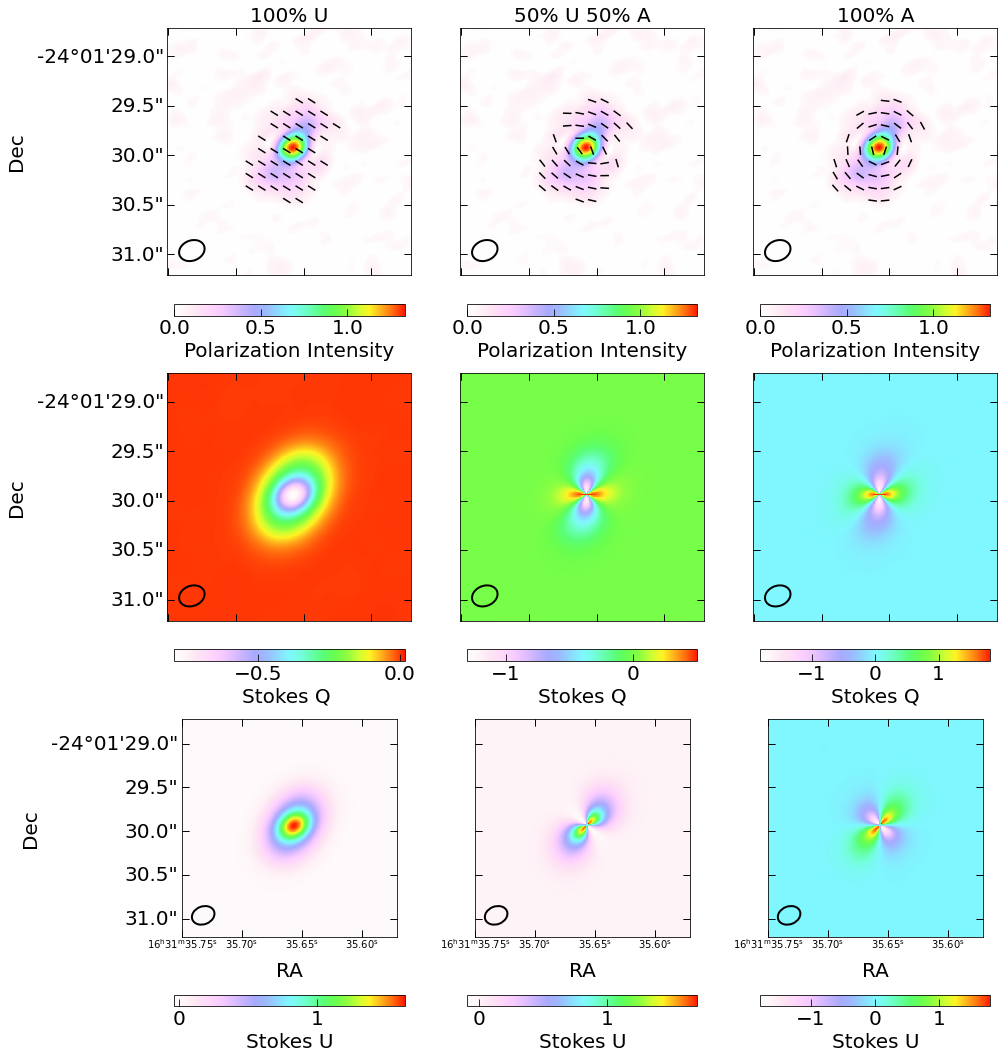

In [20]:
# Example usage
axes = plot_grids(kinda_real_data_list, soft_colormap_v2, StokesI_wcs, axis_label_fs, axis_num_fs, cbar_fs, 
                  xmin, xmax, ymin, ymax, BMAJ_pix, BMIN_pix, BPA_deg_cartesian)  # Store returned axes

# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_100Uniform_cartesian:
    axes[0, 0].plot([row[0], row[1]], [row[2], row[3]], color='black')

for row in vectors_data_50U_50A_cartesian:
    axes[0, 1].plot([row[0], row[1]], [row[2], row[3]], color='black')

# Plot vector data on the third subplot (axes[0, 2])
for row in vector_data_100Azimuthal_cartesian:
    axes[0, 2].plot([row[0], row[1]], [row[2], row[3]], color='black')



In [21]:
# Assign data to each subplot
kinda_real_data_list_with_actual = [
    PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy, PolarizedIntensity_data_2d_mJy, # Top row
    StokesQ_data_2d_mJy,            StokesQ_grid_100Uniform,        StokesQ_grid_50U_50A,           StokesQ_grid_100Azimuthal,      # Middle row
    StokesU_data_2d_mJy,            StokesU_grid_100Uniform,        StokesU_grid_50U_50A,           StokesU_grid_100Azimuthal       # Bottom row   
]

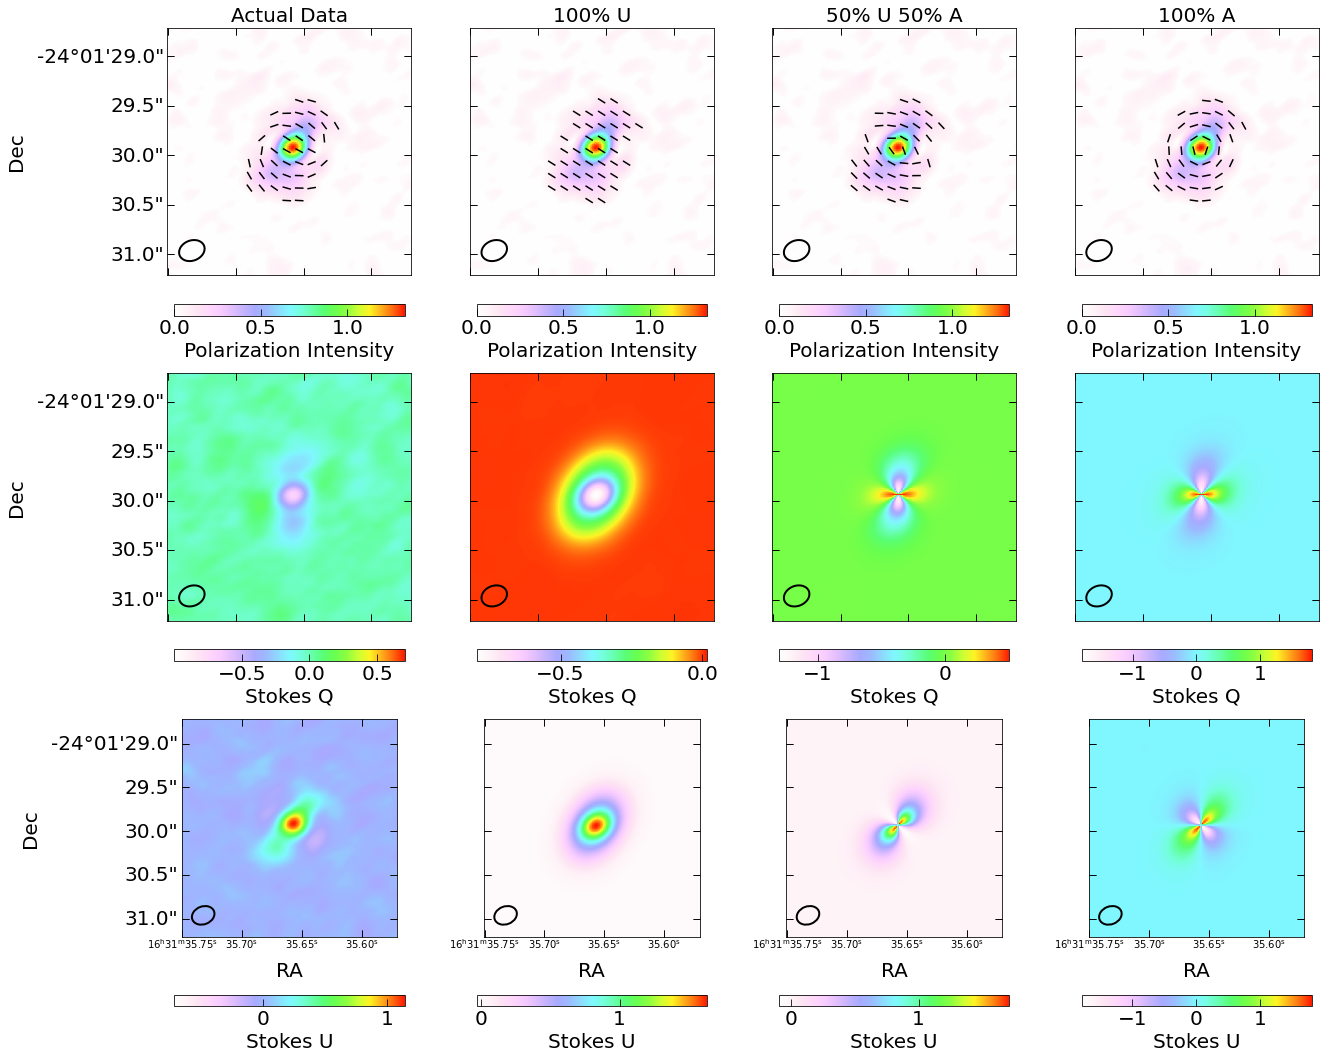

In [22]:
# Example usage
axes = plot_grids_4x3(kinda_real_data_list_with_actual, soft_colormap_v2, StokesI_wcs, axis_label_fs, axis_num_fs, cbar_fs, 
                  xmin, xmax, ymin, ymax, BMAJ_pix, BMIN_pix, BPA_deg_cartesian)  # Store returned axes

for row in vector_data_actual_cartesian:
    axes[0, 0].plot([row[0], row[1]], [row[2], row[3]], color='black')

# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_100Uniform_cartesian:
    axes[0, 1].plot([row[0], row[1]], [row[2], row[3]], color='black')
    
for row in vectors_data_50U_50A_cartesian:
    axes[0, 2].plot([row[0], row[1]], [row[2], row[3]], color='black')

# Plot vector data on the third subplot (axes[0, 2])
for row in vector_data_100Azimuthal_cartesian:
    axes[0, 3].plot([row[0], row[1]], [row[2], row[3]], color='black')


# Ratio Plots

In [23]:
# Adding titles to each subplot
ratio_titles = [
    "100% Uniform 0% Azimuthal", "0% Uniform 100% Azimuthal", 
    "90% Uniform 10% Azimuthal", "10% Uniform 90% Azimuthal",
    "80% Uniform 20% Azimuthal", "20% Uniform 80% Azimuthal",
    "70% Uniform 30% Azimuthal", "30% Uniform 70% Azimuthal",
    "60% Uniform 40% Azimuthal", "40% Uniform 60% Azimuthal",
    "50% Uniform 50% Azimuthal", "50% Uniform 50% Azimuthal"
]

In [24]:
vector_data_list = [
    vectors_data_100U_0A_cartesian, vectors_data_0U_100A_cartesian,
    vectors_data_90U_10A_cartesian, vectors_data_10U_90A_cartesian,
    vectors_data_80U_20A_cartesian, vectors_data_20U_80A_cartesian,
    vectors_data_70U_30A_cartesian, vectors_data_30U_70A_cartesian,
    vectors_data_60U_40A_cartesian, vectors_data_40U_60A_cartesian,
    vectors_data_50U_50A_cartesian, vectors_data_50U_50A_cartesian
]


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


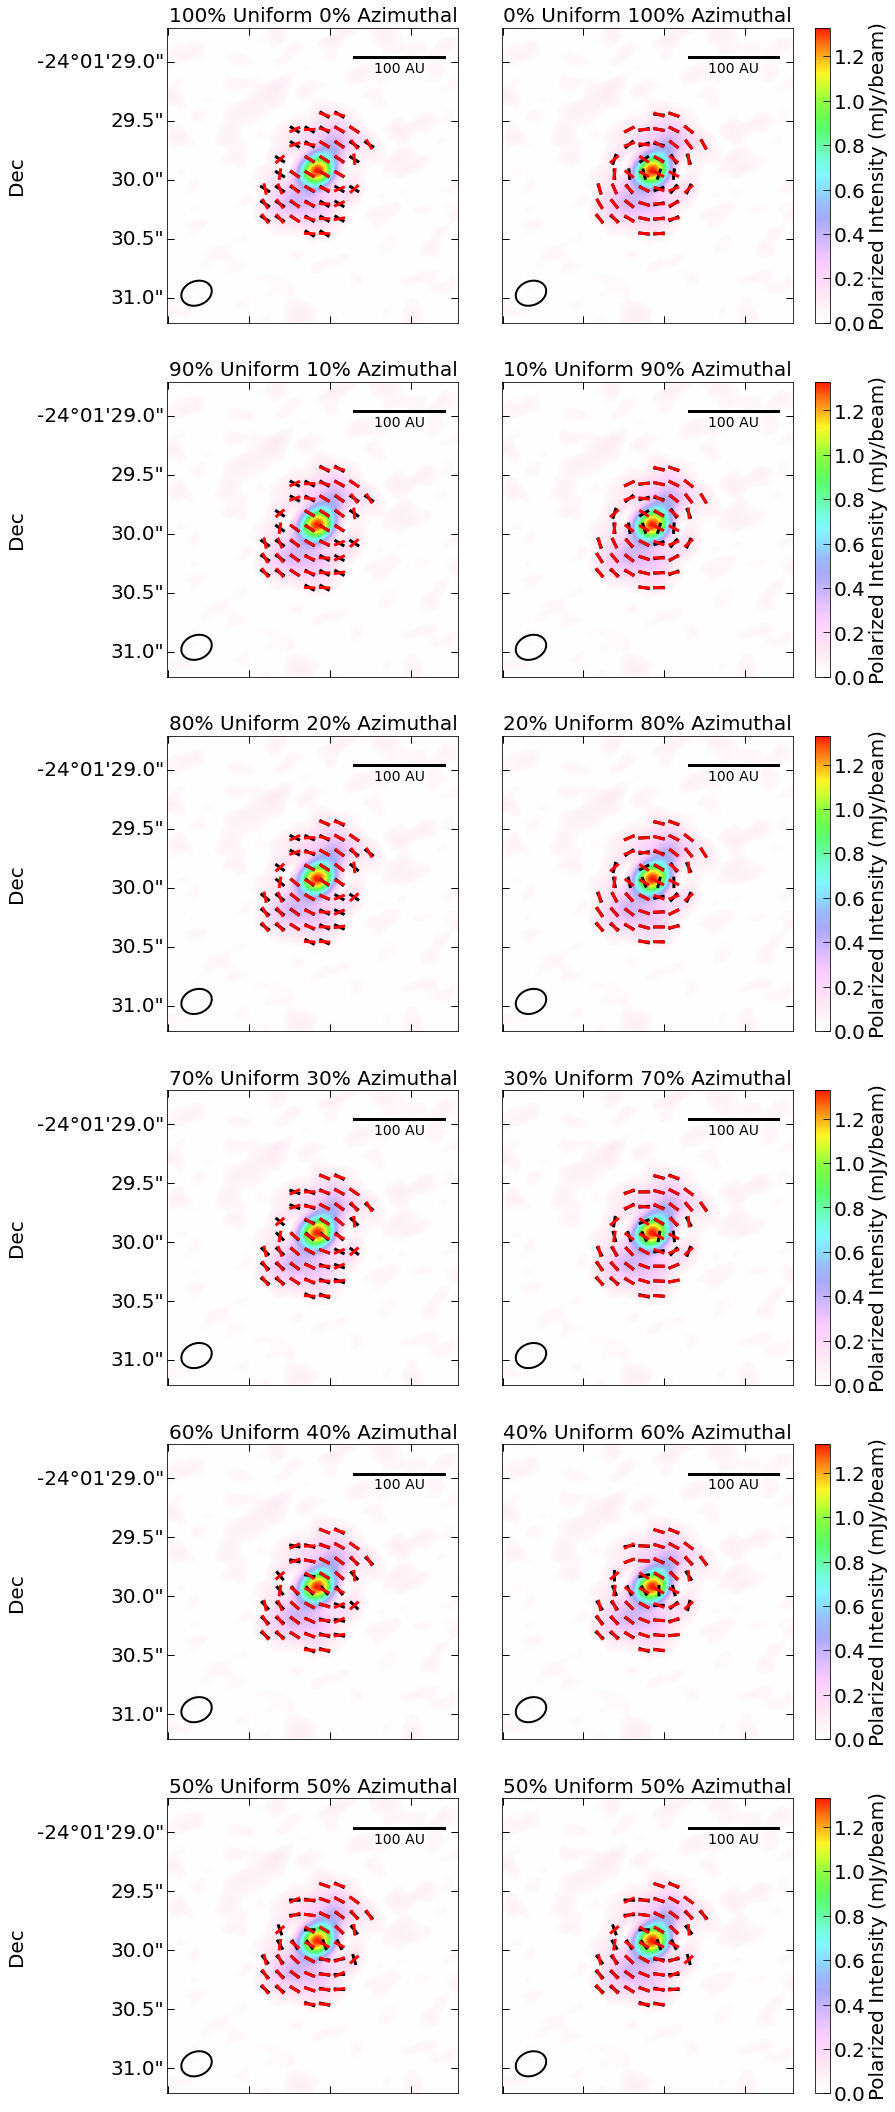

In [25]:
# Define the figure and subplots
nrows, ncols = 6, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 38), constrained_layout=True, 
                         subplot_kw={'projection': StokesI_wcs},
                         gridspec_kw={'wspace': -1})


# Loop through subplots
for i, ax in enumerate(axes.flat):
    if i >= len(ratio_grid_plot_titles):
        ax.axis("off")  # Hide empty subplots if there is extra space
        continue
    
    # Create blank grid
    row, col = divmod(i, ncols)
    create_blank_grid(row, col, ax, 
                      PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)', 0.5, 
                      StokesI_wcs, soft_colormap_v2, 
                      xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                      BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                      max_length_pix, reference_fraction)
    
    ax.set_title(ratio_grid_plot_titles[i], fontsize=20)
    
    # Add vector plots
    for row in vector_data_list[i]:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 3, label = 'Model')
        
    # Plot vector data on the first subplot (axes[0, 0])
    for row in vector_data_actual_cartesian:
        ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 3, label = 'Real')
    
    # Set axis labels and ticks
    if col == 0:
        ax.set_ylabel('Dec', fontsize=axis_label_fs)
        ax.tick_params(axis="y", which="both", left=True, labelleft=True)
    else:
        ax.tick_params(axis="y", which="both", left=True, labelleft=False)

    if row == nrows - 1:
        ax.set_xlabel('RA', fontsize=axis_label_fs)
        ax.tick_params(axis="x", which="both", bottom=True, labelbottom=True)
    else:
        ax.tick_params(axis="x", which="both", bottom=True, labelbottom=False)
        
        
    # ax.text(xmin + 5, ymax - 5, f"{i}", fontsize=16, color='blue', ha='left', va='top')

    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.minorticks_on()
    ax.tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs - 10)
    ax.tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.show()

# Comparing Model with Real Thing

To start I will just be comparing the angle of the vectors. 

If this does not work we can also compare Q and U and then do $\chi^2(Q)+\chi^2(U)$, (maybe $I$) and use a circle

$
\chi ^2 = \Sigma \frac{(O_i - E_i)^2}{E_i}
$

$\chi ^2$ = chi squared 

$O_i$ = observed value 

$E_i$ = expected value

## Trying all ratios compared to things

In [26]:
testing_vector_angles = [
    np.array(vectors_angle_100U_0A_rad_sky),  
    np.array(vectors_angle_90U_10A_rad_sky),
    np.array(vectors_angle_80U_20A_rad_sky), 
    np.array(vectors_angle_70U_30A_rad_sky), 
    np.array(vectors_angle_60U_40A_rad_sky), 
    np.array(vectors_angle_50U_50A_rad_sky), 
    np.array(vectors_angle_40U_60A_rad_sky), 
    np.array(vectors_angle_30U_70A_rad_sky), 
    np.array(vectors_angle_20U_80A_rad_sky),
    np.array(vectors_angle_10U_90A_rad_sky),
    np.array(vectors_angle_0U_100A_rad_sky)
]

## Compared to 100 U

In [59]:
min_index_100A = find_best_fit_ratio_model(vector_angle_100Uniform_sky, testing_vector_angles)

the length of chi_squared_values is : 11
Chi-squared values for ratio models:
  100 U 0 A: χ² = 0.000
  90 U 10 A: χ² = 0.069
  80 U 20 A: χ² = 0.341
  70 U 30 A: χ² = 0.991
  60 U 40 A: χ² = 2.454
  50 U 50 A: χ² = 6.749
  40 U 60 A: χ² = 24.964
  30 U 70 A: χ² = 26.015
  20 U 80 A: χ² = 27.858
  10 U 90 A: χ² = 32.889
  0 U 100 A: χ² = 34.290

Best-fit ratio model: 100 U 0 A (χ² = 0.000)


In [28]:
expected_100U = np.array(vector_angle_100Uniform_sky)

In [29]:
testing_U_angles_rad_ast = [vectors_angle_100U_0A_rad_sky[0], expected_100U[0]]

In [30]:
testing_U_angles_rad_ast_labels = ['Observed', 'Expected']

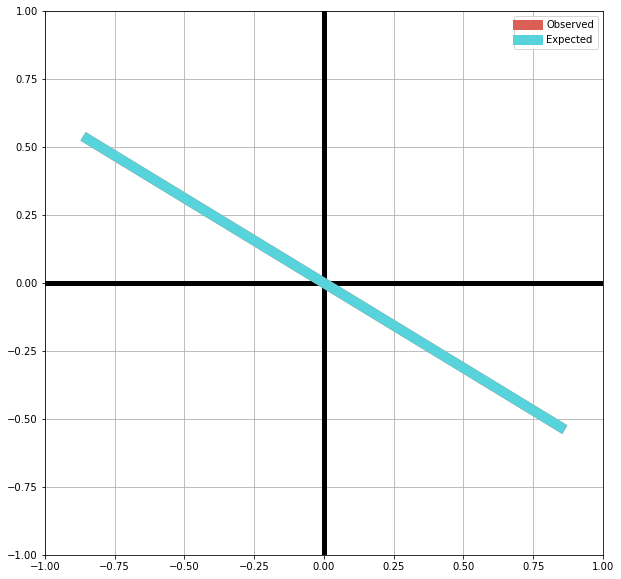

In [31]:
# Colors for each line 
colors = sns.color_palette("hls", len(testing_U_angles_rad_ast)) 

# Length of the lines (can be adjusted as needed)
line_length = 1

# Create the plot with a larger size
plt.figure(figsize=(10, 10))

# Set axis limits to show all four quadrants
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot the black axes at x=0 and y=0
plt.axvline(x=0, color='black', linestyle='-', lw=5)
plt.axhline(y=0, color='black', linestyle='-', lw=5)

# Loop through each angle and plot the corresponding colored line
for i, angle_rad in enumerate(testing_U_angles_rad_ast):
    # Convert angle from degrees to radians
    # angle_rad = np.radians(angle_deg)  # Use the angle in degrees for conversion to radians
    
    # Calculate the Cartesian coordinates for the line
    x = line_length * np.cos(angle_rad + np.pi / 2 )
    y = line_length * np.sin(angle_rad + np.pi / 2)
    
    # Plot the line from (0,0) to (x, y) using the color from the 'colors' array
    plt.plot([-x, x], [-y, y], color=colors[i], label=testing_U_angles_rad_ast_labels[i], lw=10)

# Add grid and legend to the plot
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


## Compared to 100 Azimuthal

In [58]:
min_index_100A = find_best_fit_ratio_model(vector_angle_100Azimuthal_sky, testing_vector_angles)

the length of chi_squared_values is : 11
Chi-squared values for ratio models:
  100 U 0 A: χ² = 34.290
  90 U 10 A: χ² = 32.889
  80 U 20 A: χ² = 31.464
  70 U 30 A: χ² = 30.253
  60 U 40 A: χ² = 30.132
  50 U 50 A: χ² = 35.069
  40 U 60 A: χ² = 10.039
  30 U 70 A: χ² = 9.506
  20 U 80 A: χ² = 9.488
  10 U 90 A: χ² = 0.069
  0 U 100 A: χ² = 0.000

Best-fit ratio model: 0 U 100 A (χ² = 0.000)


## Compared to 5050

In [57]:
min_index_5050 = find_best_fit_ratio_model(vectors_angle_50U_50A_rad_sky, testing_vector_angles)

the length of chi_squared_values is : 11
Chi-squared values for ratio models:
  100 U 0 A: χ² = 6.749
  90 U 10 A: χ² = 5.670
  80 U 20 A: χ² = 4.454
  70 U 30 A: χ² = 3.070
  60 U 40 A: χ² = 1.463
  50 U 50 A: χ² = 0.000
  40 U 60 A: χ² = 29.991
  30 U 70 A: χ² = 27.972
  20 U 80 A: χ² = 27.781
  10 U 90 A: χ² = 34.816
  0 U 100 A: χ² = 35.069

Best-fit ratio model: 50 U 50 A (χ² = 0.000)


## Compared to real

In [61]:
min_index = find_best_fit_ratio_model(vector_angle_actual_sky, testing_vector_angles)

the length of chi_squared_values is : 11
Chi-squared values for ratio models:
  100 U 0 A: χ² = 18.705
  90 U 10 A: χ² = 17.835
  80 U 20 A: χ² = 17.042
  70 U 30 A: χ² = 16.502
  60 U 40 A: χ² = 16.764
  50 U 50 A: χ² = 20.498
  40 U 60 A: χ² = 19.534
  30 U 70 A: χ² = 19.384
  20 U 80 A: χ² = 20.038
  10 U 90 A: χ² = 23.503
  0 U 100 A: χ² = 23.965

Best-fit ratio model: 70 U 30 A (χ² = 16.502)


# Make a Big Plot of the best data

In [62]:
import matplotlib.patches as patches

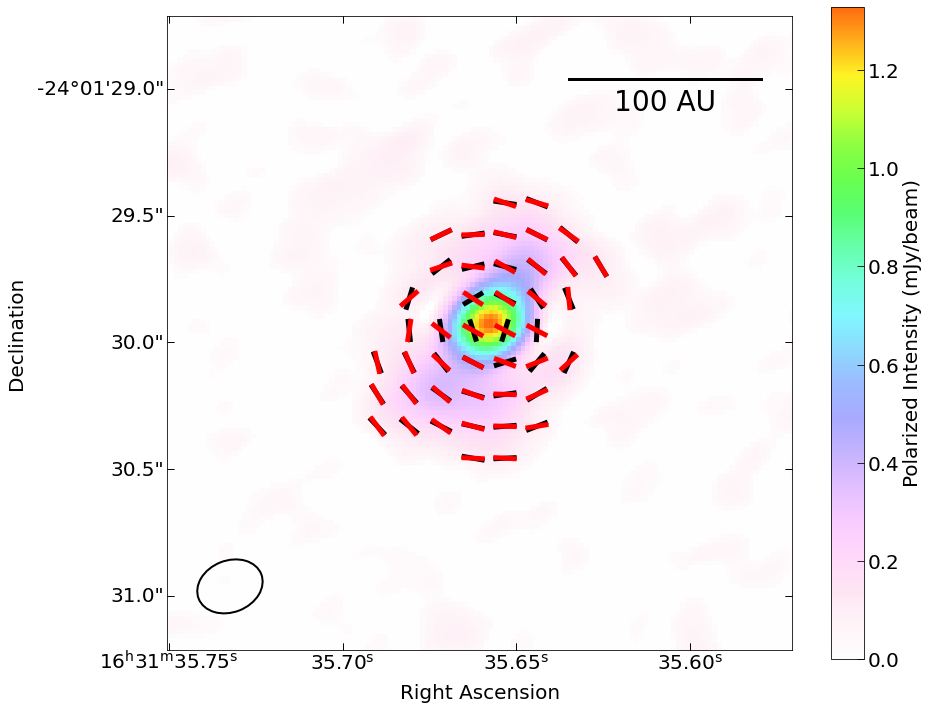

In [63]:
fig, ax = create_base_plot(StokesI_wcs, PolarizedIntensity_data_2d_mJy, 'Polarized Intensity (mJy/beam)',
                           soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Add vector plots
for row in vector_data_list[min_index]:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw = 5, label = 'Best Model')

# Plot vector data on the first subplot (axes[0, 0])
for row in vector_data_actual_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw = 5, label = 'Real')